In [3]:
import stockapi
import json
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pylab import rcParams
rcParams['figure.figsize'] = 15, 20

cnx = stockapi.connect_db()

df = stockapi.read_data(cnx)

my_portfolio = ['GNCH.KL',
 'TCOM.KL',
 'MBMR.KL',
 'SERB.KL',
 'AIRA.KL',
 'LHEN.KL',
 'CYPR.KL',
 'KPOW.KL',               
 'JHTN.KL',               
 'KOBA.KL',          
 'KKBE.KL',              
 'EUPE.KL',              
 'FPIB.KL',
 'SAHB.KL',
 'AGES.KL'
]

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [9]:
def get_correlation(df, portfolio, threshold=0.9):
    df = df[df["stockcode"].isin(portfolio)]
    stockcode_to_price = {x:list(df[df['stockcode'] == x]['price']) for x in portfolio}
    
    #make sure all stock_code len is the same
    min_len = min([len(x) for x in stockcode_to_price.values()])
    stockcode_to_price = {k:v[:min_len] for k,v in stockcode_to_price.items()}

    df_test = pd.DataFrame(stockcode_to_price)
    
    plt.matshow(df_test.corr())
    plt.xticks(range(len(df_test.columns)), df_test.columns)
    plt.yticks(range(len(df_test.columns)), df_test.columns)
    plt.colorbar()
    plt.show()
    
    double_corr = df_test.corr().corr()
    code_to_correlated = {}
    for code in portfolio:
        result = [(x, y) for x, y in df_test.corr().corr()[code].items() if y > threshold and x != code]
        print(f"CURRENTLY ANALYSING {code}")
        print("HIGHLY CORRELATED STOCKS BELOW")
        print(result)
        print()
        code_to_correlated[code] = result
    return code_to_correlated

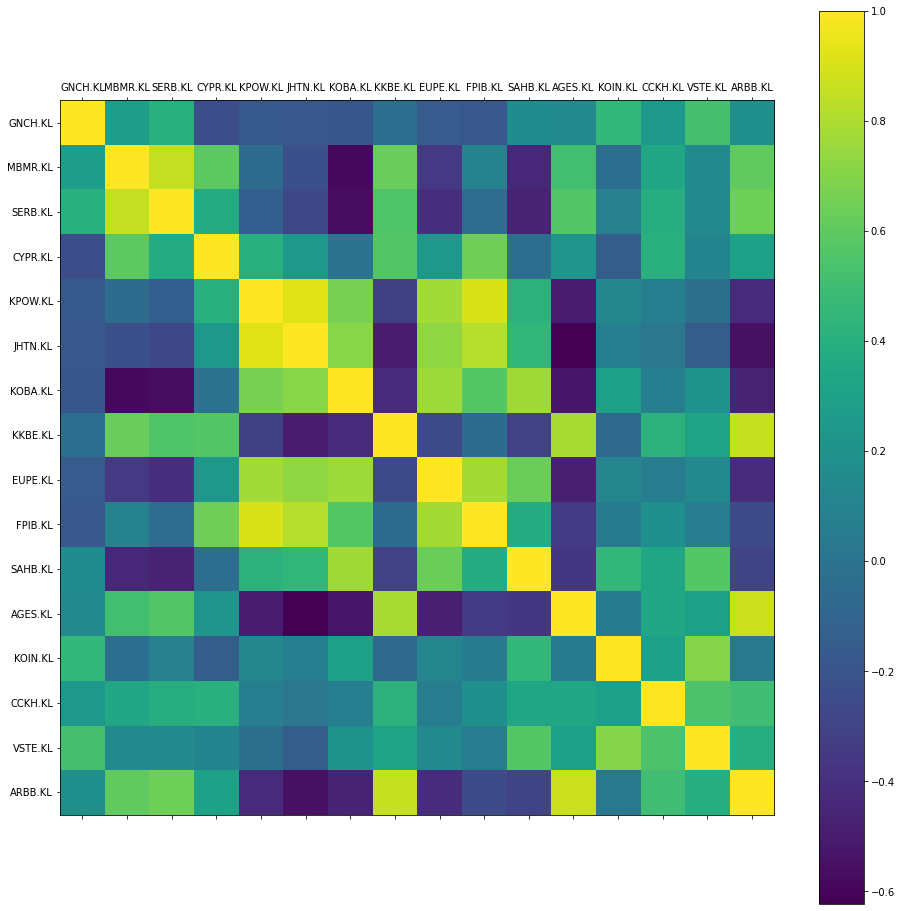

CURRENTLY ANALYSING GNCH.KL
HIGHLY CORRELATED STOCKS BELOW
[]

CURRENTLY ANALYSING MBMR.KL
HIGHLY CORRELATED STOCKS BELOW
[('SERB.KL', 0.9758661978566305)]

CURRENTLY ANALYSING SERB.KL
HIGHLY CORRELATED STOCKS BELOW
[('MBMR.KL', 0.9758661978566305)]

CURRENTLY ANALYSING CYPR.KL
HIGHLY CORRELATED STOCKS BELOW
[]

CURRENTLY ANALYSING KPOW.KL
HIGHLY CORRELATED STOCKS BELOW
[('JHTN.KL', 0.9930684483664362), ('EUPE.KL', 0.9481025790117887), ('FPIB.KL', 0.9744380128242645)]

CURRENTLY ANALYSING JHTN.KL
HIGHLY CORRELATED STOCKS BELOW
[('KPOW.KL', 0.9930684483664362), ('KOBA.KL', 0.9051847912636918), ('EUPE.KL', 0.9572664229118841), ('FPIB.KL', 0.9470829285136181)]

CURRENTLY ANALYSING KOBA.KL
HIGHLY CORRELATED STOCKS BELOW
[('JHTN.KL', 0.9051847912636918), ('EUPE.KL', 0.9617463958895421), ('SAHB.KL', 0.9271398915037814)]

CURRENTLY ANALYSING KKBE.KL
HIGHLY CORRELATED STOCKS BELOW
[('AGES.KL', 0.9561869754432638), ('ARBB.KL', 0.9675470669584189)]

CURRENTLY ANALYSING EUPE.KL
HIGHLY CORRELATED 

In [11]:
temp_portfolio = ['GNCH.KL',
 'MBMR.KL',
 'SERB.KL',
 'CYPR.KL',
 'KPOW.KL',   
 'JHTN.KL',               
 'KOBA.KL',          
 'KKBE.KL',              
 'EUPE.KL',              
 'FPIB.KL',
 'SAHB.KL',
 'AGES.KL'
]
code_to_correlated = get_correlation(df, temp_portfolio + ['KOIN.KL', 'CCKH.KL', 'VSTE.KL'] , threshold=0.9)

In [ ]:
#CURRENT CLUSTER
#'JHTN.KL', 'EUPE.KL', 'FPIB.KL', 'KPOW.KL'

In [ ]:
# BUY KOTRA, BUY CCK, BUY VSTE,  SELL LIIHEN, SELL TIMECOM, SELL AIRA

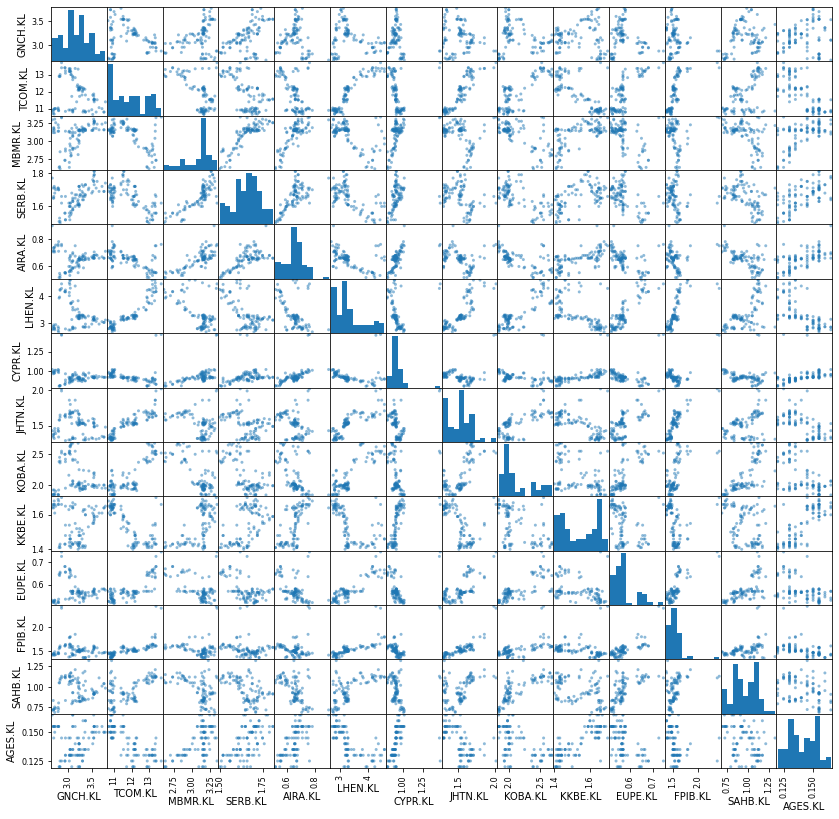

In [11]:
scatter_matrix(df_test, figsize=(len(df_test.columns), len(df_test.columns)))
plt.show()